<a href="https://colab.research.google.com/github/Tiagoeem/visao_2022_batalha_das_redes/blob/main/batalha_das_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
from tensorflow.math import confusion_matrix
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline

# Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255

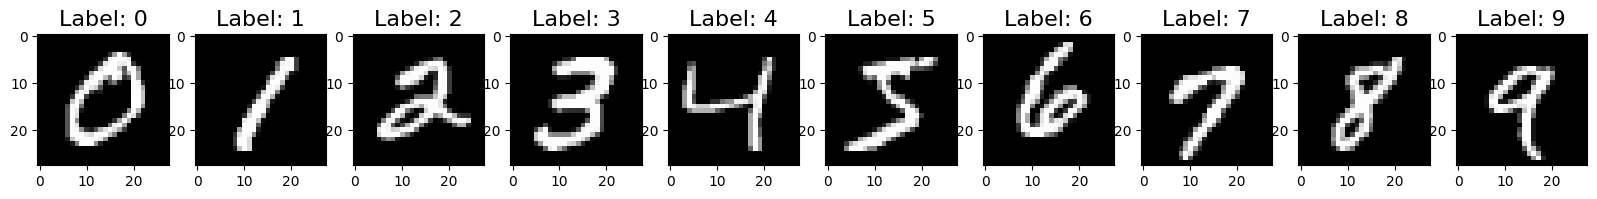

In [3]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

# NET

In [4]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 10)                27050     
                                                                 
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________


2022-09-01 09:07:53.238169: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-01 09:07:53.238267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
callback_es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model_log = model.fit(X_train, y_train, epochs=3, batch_size=16, validation_split=.2, callbacks=[callback_es], validation_data=(X_test, y_test))


Epoch 1/3


2022-09-01 09:07:53.384663: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-01 09:07:53.536525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3750/3750 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.9315

2022-09-01 09:08:12.072781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3750/3750 [==============================] - 20s 5ms/step - loss: 0.2360 - accuracy: 0.9315 - val_loss: 0.1045 - val_accuracy: 0.9694
Epoch 2/3
3750/3750 [==============================] - 21s 5ms/step - loss: 0.0868 - accuracy: 0.9747 - val_loss: 0.0682 - val_accuracy: 0.9786
Epoch 3/3
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0647 - accuracy: 0.9807 - val_loss: 0.0626 - val_accuracy: 0.9797


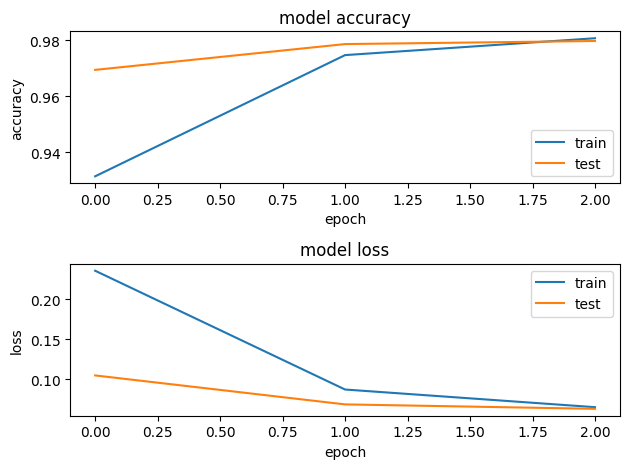

In [6]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout();


In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))


 36/313 [==>...........................] - ETA: 1s - loss: 0.0810 - accuracy: 0.9766

2022-09-01 09:08:54.834153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.0626 - accuracy: 0.9797
Test Loss: 0.06260482966899872, Test Accuracy: 0.9797000288963318


In [8]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)

for i in range(10):
    print(f'True: {y_test[i]}\tPred: {np.argmax(predictions[i])}\n')
    

 92/313 [=======>......................] - ETA: 0s

2022-09-01 09:08:56.313288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
True: 7	Pred: 7

True: 2	Pred: 2

True: 1	Pred: 1

True: 0	Pred: 0

True: 4	Pred: 4

True: 1	Pred: 1

True: 4	Pred: 4

True: 9	Pred: 9

True: 5	Pred: 5

True: 9	Pred: 9



1/1 [==============================] - 0s 35ms/step


2022-09-01 09:08:56.898005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


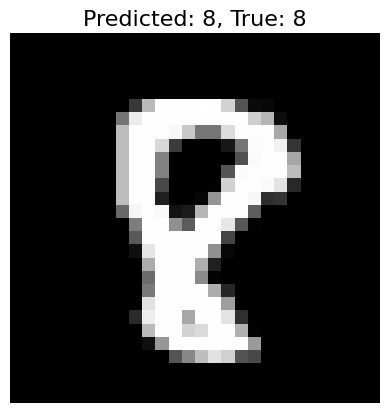

In [9]:
random_idx = np.random.choice(len(X_test))
x_sample = X_test[random_idx]
y_sample_true = y_test[random_idx]
y_guess = np.argmax(model.predict(tf.expand_dims(x_sample,0)), axis=1)

plt.title("Predicted: {}, True: {}".format(y_guess[0], y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')
plt.axis(False);


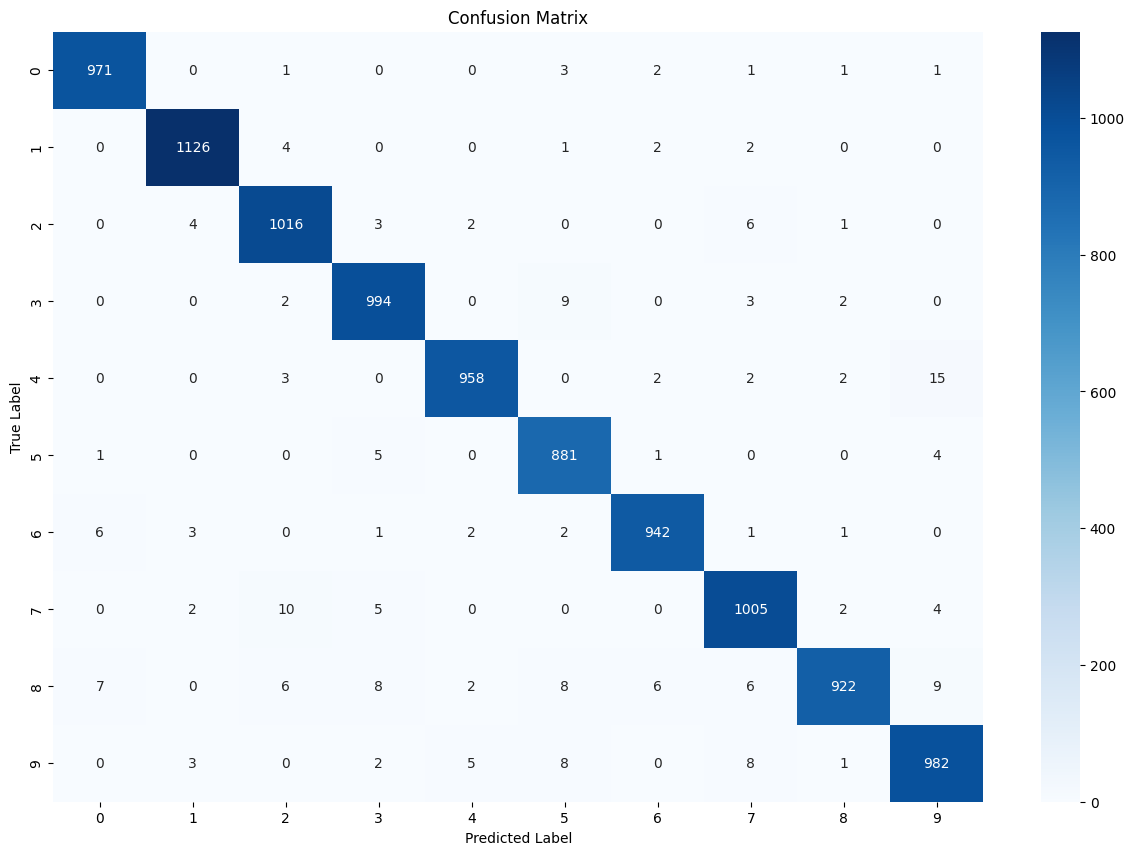

In [10]:
confusion_mtx = confusion_matrix(y_test, np.argmax(predictions, axis=1))

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');


# Configuração



In [11]:
# Grupos
grupos = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6']
seu_grupo = 'G2' # substitua o x pelo número do seu grupo

In [12]:
from pathlib import Path

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

raiz_desafio = Path('batalha_das_redes/Desafios/')
dict_desafios = {}
for dir in raiz_desafio.iterdir():
    nome_grupo = str(dir).split('_')[2].split('/')[2]
    dict_desafios[nome_grupo] = {}
    for arq in dir.iterdir():
        digito = str(arq).split('.')[0][-1]
        dict_desafios[nome_grupo][digito] = {}
        dict_desafios[nome_grupo][digito]['true'] = int(digito)
        dict_desafios[nome_grupo][digito]['file'] = arq
        im = cv.imread(str(arq.resolve()))
        b,g,r = cv.split(im)
        p = np.array(b).astype('float32')
        dict_desafios[nome_grupo][digito]['imagem'] = p / 255
        dict_desafios[nome_grupo][digito]['predito'] = 0

## Exemplo de uso

In [14]:
dict_desafios['G3']['3']['imagem']

array([[0.00392157, 0.        , 0.00392157, 0.00392157, 0.        ,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.        , 0.00392157,
        0.        , 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157],
       [0.00392157, 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.        , 0.00392157,
        0.00392157, 0.00392157, 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        , 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.        , 0.0039

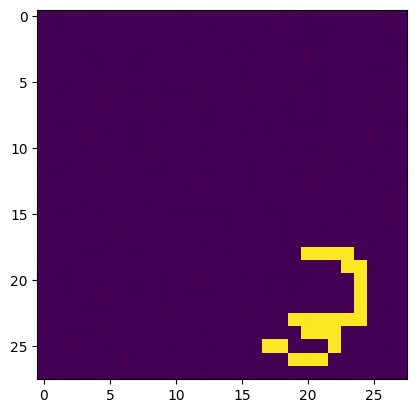

In [15]:
plt.imshow(dict_desafios['G3']['3']['imagem'])
plt.show()

In [16]:
predicao = model.predict( np.array([ dict_desafios['G3']['3']['imagem'] ]) )
np.argmax(predicao)

1/1 [==============================] - 0s 14ms/step


1

In [17]:
# armazenar predição
dict_desafios['G3']['3']['predito'] = np.argmax(predicao)

for grupo in dict_desafios:
  for digito in dict_desafios[grupo]:
    pred = model.predict(np.array([dict_desafios[grupo][f'{digito}']['imagem']]))
    dict_desafios[grupo][digito]['predito'] = np.argmax(pred)


1/1 [==============================] - 0s 10ms/step


# Desempenho

Utilize a função verificacao_desempenho

In [18]:
def verificacao_desempenho(dict_desafio):
    pontuacoes = {} 
    pontuacoes['acertos_totais'] = 0
    pontuacoes['total'] = 0
    pontuacoes['%'] = 0
    for grupo in dict_desafio:
        
        pontuacoes[grupo] = {}
        pontuacoes[grupo]['acertos'] = 0
        pontuacoes[grupo]['total'] = 0
        pontuacoes[grupo]['%'] = 0
        for digito in dict_desafio[grupo]:
            pontuacoes['total'] += 1
            pontuacoes[grupo]['total'] += 1

            if dict_desafio[grupo][digito]['predito'] == dict_desafio[grupo][digito]['true']:
                pontuacoes[grupo]['acertos'] += 1
                pontuacoes['acertos_totais'] += 1

            pontuacoes[grupo]['%'] = pontuacoes[grupo]['acertos'] / pontuacoes[grupo]['total']

            pontuacoes['%'] = pontuacoes['acertos_totais'] / pontuacoes['total']

    return pontuacoes

In [19]:
verificacao_desempenho( dict_desafios )

{'acertos_totais': 19,
 'total': 37,
 '%': 0.5135135135135135,
 'G6': {'acertos': 4, 'total': 7, '%': 0.5714285714285714},
 'G1': {'acertos': 1, 'total': 3, '%': 0.3333333333333333},
 'Tiago': {'acertos': 1, 'total': 3, '%': 0.3333333333333333},
 'G2': {'acertos': 7, 'total': 10, '%': 0.7},
 'G5': {'acertos': 1, 'total': 4, '%': 0.25},
 'G4': {'acertos': 3, 'total': 4, '%': 0.75},
 'G3': {'acertos': 2, 'total': 6, '%': 0.3333333333333333}}